# NATURAL GAS PRICE PRDICTION USING IBM WATSON MACHINE LAERNING SERVICE

# This file contains PreProcessing 

# Importing the Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

Importing the Data into a Pandas DataFrame for further analysis

In [2]:
data=pd.read_csv('naturalgas.csv')
data

,Date,Price
0,1997-01-07,3.82
1,1997-01-08,3.80
2,1997-01-09,3.61
3,1997-01-10,3.92
4,1997-01-13,4.00
...,...,...
5933,2020-08-05,2.23
5934,2020-08-06,2.26
5935,2020-08-07,2.15
5936,2020-08-10,2.18


First 5 entries of the data

In [3]:
data.head()

,Date,Price
0,1997-01-07,3.82
1,1997-01-08,3.80
2,1997-01-09,3.61
3,1997-01-10,3.92
4,1997-01-13,4.00


Splitting the Date into 3 columns

In [4]:
data['year'] = pd.DatetimeIndex(data['Date']).year
data['month'] = pd.DatetimeIndex(data['Date']).month
data['day'] = pd.DatetimeIndex(data['Date']).day

In [5]:
data.drop('Date',axis=1,inplace=True)

In [6]:
data

,Price,year,month,day
0,3.82,1997,1,7
1,3.80,1997,1,8
2,3.61,1997,1,9
3,3.92,1997,1,10
4,4.00,1997,1,13
...,...,...,...,...
5933,2.23,2020,8,5
5934,2.26,2020,8,6
5935,2.15,2020,8,7
5936,2.18,2020,8,10


# Handling Null Values

In [7]:
data.isnull().any()

Price     True
year     False
month    False
day      False
dtype: bool

As it is continuous data so we are checking it is normal distribution or skewed distribution?

C:\Users\Namitha\miniconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


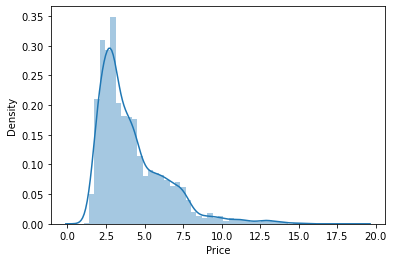

In [8]:
import seaborn as sns
sns.distplot(data['Price'].dropna())

As we got normal distribution curve so we are filling NULL values with mean 

In [9]:
data['Price'].fillna(data['Price'].mean(),inplace=True)

In [10]:
data.isnull().sum()

Price    0
year     0
month    0
day      0
dtype: int64

In [11]:
data.describe()

,Price,year,month,day
count,5938.000000,5938.000000,5938.000000,5938.000000
mean,4.189230,2008.366959,6.468003,15.712193
std,2.191026,6.825348,3.415981,8.742158
min,1.050000,1997.000000,1.000000,1.000000
25%,2.660000,2002.000000,4.000000,8.000000
50%,3.540000,2008.000000,6.000000,16.000000
75%,5.240000,2014.000000,9.000000,23.000000
max,18.480000,2020.000000,12.000000,31.000000


# Finding and Removing Outliers

C:\Users\Namitha\miniconda3\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


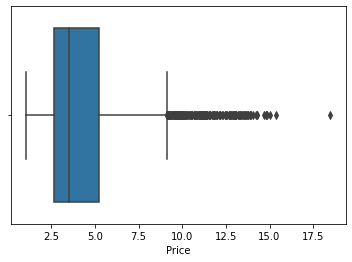

In [12]:
import seaborn as sns
sns.boxplot(data['Price'])

In [13]:
from scipy import stats

In [14]:
z=np.abs(stats.zscore(data))
z

array([[0.16853354, 1.6655437 , 1.600847  , 0.99665627],
       [0.17766245, 1.6655437 , 1.600847  , 0.8822584 ],
       [0.26438712, 1.6655437 , 1.600847  , 0.76786053],
       ...,
       [0.93079774, 1.70453149, 0.44851721, 0.99665627],
       [0.91710437, 1.70453149, 0.44851721, 0.65346267],
       [0.91253992, 1.70453149, 0.44851721, 0.5390648 ]])

In [15]:
threshold=3
np.where(z>threshold)

(array([1534, 1535, 1538, 2164, 2165, 2166, 2167, 2168, 2169, 2170, 2171,
        2174, 2175, 2176, 2177, 2178, 2179, 2180, 2181, 2182, 2183, 2184,
        2185, 2186, 2187, 2188, 2189, 2190, 2191, 2192, 2193, 2194, 2195,
        2196, 2197, 2198, 2199, 2200, 2209, 2210, 2213, 2214, 2215, 2216,
        2217, 2218, 2219, 2220, 2221, 2222, 2223, 2224, 2225, 2226, 2227,
        2228, 2229, 2230, 2231, 2232, 2233, 2234, 2820, 2821, 2822, 2825,
        2826, 2827, 2828, 2829, 2830, 2831, 2832, 2833, 2834, 2835, 2836,
        2837, 2838, 2839, 2840, 2841, 2842, 2843, 2844, 2845, 2846, 2847,
        2848, 2849, 2850, 2851, 2852, 2853, 2854, 2855, 2856, 2857, 2858,
        2859, 2860, 2861, 2862, 2863, 2864, 2865, 2866, 2867, 2868, 2869,
        2870, 2871, 2872, 2873, 2874, 2875, 2876], dtype=int64),
 array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 

In [16]:
df_no_outliers=data[(z<=3).all(axis=1)]
df_no_outliers

,Price,year,month,day
0,3.82,1997,1,7
1,3.80,1997,1,8
2,3.61,1997,1,9
3,3.92,1997,1,10
4,4.00,1997,1,13
...,...,...,...,...
5933,2.23,2020,8,5
5934,2.26,2020,8,6
5935,2.15,2020,8,7
5936,2.18,2020,8,10


In [17]:
df_no_outliers.shape

(5821, 4)

# Data Visualization

Scatter Plot

No handles with labels found to put in legend.


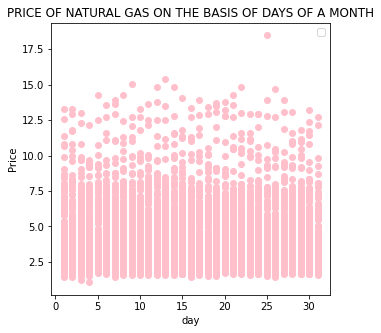

In [18]:
fig=plt.figure(figsize=(5,5))
plt.scatter(data['day'],data['Price'],color='pink')
plt.xlabel('day')
plt.ylabel('Price')
plt.title('PRICE OF NATURAL GAS ON THE BASIS OF DAYS OF A MONTH')
plt.legend()

No handles with labels found to put in legend.


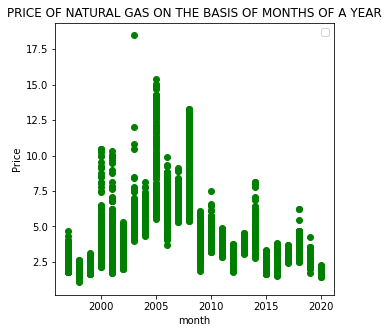

In [19]:
fig=plt.figure(figsize=(5,5))
plt.scatter(data['year'],data['Price'],color='green')
plt.xlabel('month')
plt.ylabel('Price')
plt.title('PRICE OF NATURAL GAS ON THE BASIS OF MONTHS OF A YEAR')
plt.legend()

HEAT MAP

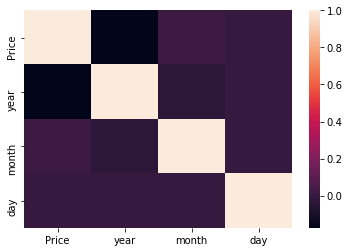

In [20]:
sns.heatmap(data.corr())

BAR GRAPH

No handles with labels found to put in legend.


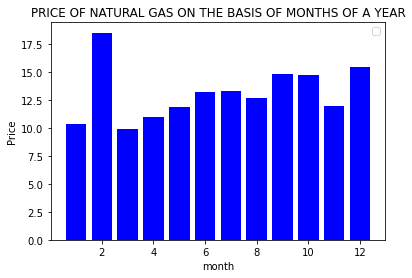

In [21]:
plt.bar(data['month'],data['Price'],color='blue')
plt.xlabel('month')
plt.ylabel('Price')
plt.title('PRICE OF NATURAL GAS ON THE BASIS OF MONTHS OF A YEAR')
plt.legend()

LINE GRAPH

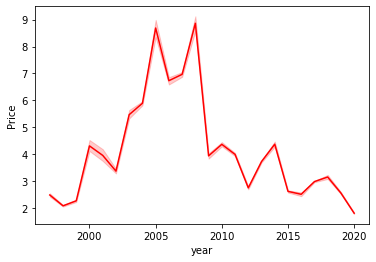

In [22]:
import seaborn as sns
sns.lineplot(x='year',y='Price',data=data,color='red')

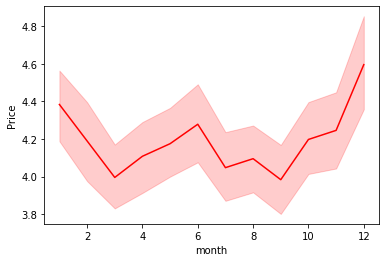

In [23]:
sns.lineplot(x='month',y='Price',data=data,color='red')

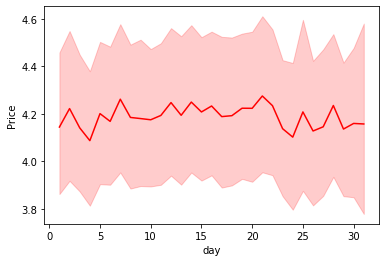

In [24]:
sns.lineplot(x='day',y='Price',data=data,color='red')

HISTOGRAM

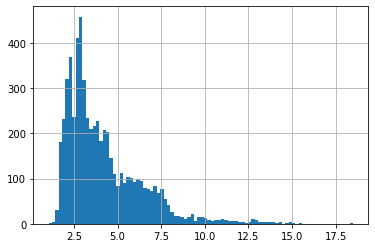

In [25]:
data['Price'].hist(bins=90)

BOX PLOT

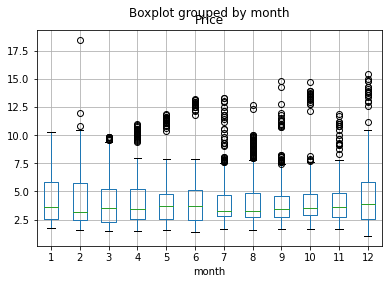

In [26]:
data.boxplot(column='Price',by='month')

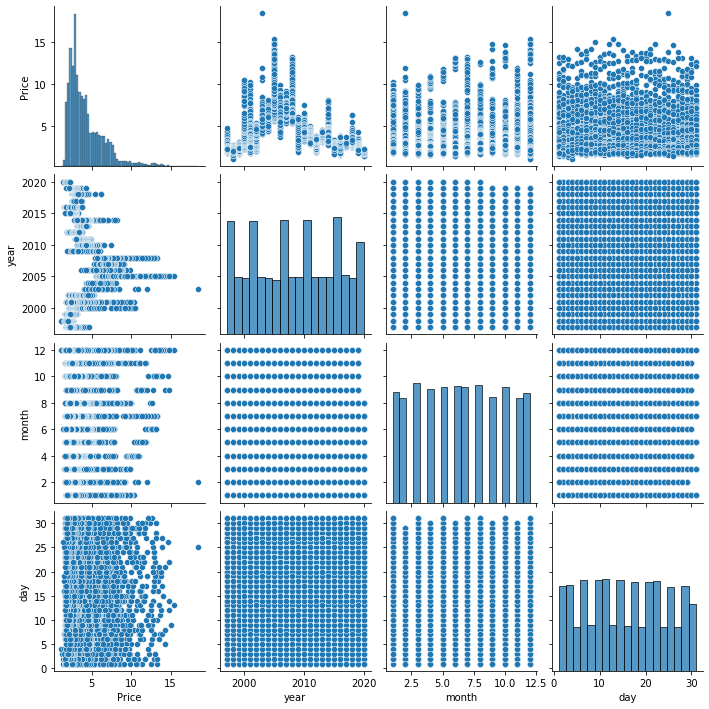

In [27]:
sns.pairplot(data)
plt.show()

# separating dependent and independent variables

In [28]:
x=data.iloc[:,1:4].values
y=data.iloc[:,0].values
x

array([[1997,    1,    7],
       [1997,    1,    8],
       [1997,    1,    9],
       ...,
       [2020,    8,    7],
       [2020,    8,   10],
       [2020,    8,   11]], dtype=int64)

In [29]:
y

array([3.82, 3.8 , 3.61, ..., 2.15, 2.18, 2.19])

# Train and Test

In [30]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=0)

In [31]:
x_train.shape

(4750, 3)

In [32]:
y_train.shape

(4750,)